In [67]:
# U.S. Medical Insurance Costs
#import statements
import csv 
import json 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean
import seaborn as sns
from matplotlib import style
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
  

In [155]:
#import insurance data
with open('insurance.csv', newline='') as insurance_file:
    insurance_dict = csv.DictReader(insurance_file)
    medical_records = list(insurance_dict)
    '''
        for row in insurance_dict:
        medical_records.update(dict(row))
        medical_records.update({"Age": row["age"], "Sex": row["sex"],
                                "BMI": row["bmi"], "Children": row["children"],
                              "Smoker": row["smoker"], "Region": row["region"],
                           "Insurance_cost": row["charges"]})
    '''
#using Pandas
insurance_data = pd.read_csv('insurance.csv')
#insurance_pd_dict = {col: dict(insurance_data[col]) for col in insurance_data.columns}
medical_pd_records = insurance_data.to_dict()
print(insurance_data)

    

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [107]:
#Functions to obtain individual variables from the data
def get_variable(insurance_records, subset):
    subset = insurance_records[subset]
    return subset
AGES = get_variable(medical_pd_records, 'age')
BMI = get_variable(medical_pd_records, 'bmi')
SEX = get_variable(medical_pd_records, 'sex')
CHILDREN = get_variable(medical_pd_records, 'children')
REGION = get_variable(medical_pd_records, 'region')
SMOKER_STATUS = get_variable(medical_pd_records, 'smoker')
COSTS = get_variable(medical_pd_records, 'charges')



[27.9  33.77 33.   ... 36.85 25.8  29.07]


In [4]:
#Functions to obtain averages over the whole population
def get_average(variable_dict):
    average = mean(variable_dict.values())
    return average
AGE_AVG = get_average(AGES)
COST_AVG = get_average(COSTS)
BMI_AVG = get_average(BMI)
NR_CHILDREN_AVG = get_average(CHILDREN)

    

In [158]:
#Functions to obtain subsets from the dataset e.g. the smokers/non-smokers, males/females etc. 
def get_subset(dataset, subset_variable, desired_variable):
    desired_variable_indices = list()
    desired_variable_dict = dict()
    for (key,value) in dataset[subset_variable].items():
        if value == desired_variable:
            desired_variable_indices.append(key)
    for (key1,values1) in dataset.items():
        for (key2,values2) in values1.items():
            if key2 in desired_variable_indices and key1 not in desired_variable_dict.keys():
                desired_variable_dict[key1] = {key2: values2}
            elif key2 in desired_variable_indices:
                desired_variable_dict[key1].update({key2: values2})
        
    return desired_variable_dict
SMOKER_SUBSET = get_subset(medical_pd_records, 'smoker', 'yes')
NON_SMOKER_SUBSET = get_subset(medical_pd_records, 'smoker', 'no')
MALE_SUBSET = get_subset(medical_pd_records, 'sex', 'male')
NO_CHILDREN = get_subset(medical_pd_records, 'children', 0)
ONE_CHILD = get_subset(medical_pd_records, 'children', 1)
FEMALE_SUBSET = get_subset(medical_pd_records, 'sex', 'female')       
MALE_AGES =  get_variable(MALE_SUBSET, 'age')
MALE_AGE_AVG = get_average(MALE_AGES)

male_df = insurance_data[insurance_data['sex']=='male']
female_df = insurance_data[insurance_data['sex']=='female']
smoker_df = insurance_data[insurance_data['smoker']=='yes']
non_smoker_df = insurance_data[insurance_data['smoker']=='no']
male_smoker_df = male_df[male_df['smoker']=='yes']
male_non_smoker_df = male_df[male_df['smoker']=='no']
female_smoker_df = female_df[female_df['smoker']=='yes']
female_non_smoker_df = female_df[female_df['smoker']=='no']
no_children_df = insurance_data[insurance_data['children']== 0]
one_child_df =  insurance_data[insurance_data['children']== 1]
two_children_df =  insurance_data[insurance_data['children']== 2]
three_children_df =  insurance_data[insurance_data['children']== 3]
four_children_df =  insurance_data[insurance_data['children']== 4]
five_children_df =  insurance_data[insurance_data['children']== 5]
northeast_df = insurance_data[insurance_data['region']=='northeast']
northwest_df = insurance_data[insurance_data['region']=='northwest']
southeast_df = insurance_data[insurance_data['region']=='southeast']
southwest_df = insurance_data[insurance_data['region']=='southwest']
#get dataframes for ages
age_dfs = list()
costs_per_age = list()
for age in range(min(AGES.values()), max(AGES.values())):
    age_df = insurance_data[insurance_data['age'] == age]
    age_dfs.append(age_df)
    cost_list = insurance_data['charges'].tolist()
    costs_per_age.append(cost_list)
    
#Function to obtain ratios within data
def get_ratio(population, population_with_variable):
    ratio = len(population_with_variable)/len(population)
    return ratio
def get_nr(population_with_variable):
    return len(population_with_variable)
nr_males = get_nr(male_df)
nr_females = get_nr(female_df)
nr_male_smokers = get_nr(male_smoker_df)
nr_female_smokers = get_nr(female_smoker_df)
male_ratio = get_ratio(insurance_data, male_df)
female_ratio = get_ratio(insurance_data, female_df)
male_smoker_ratio = get_ratio(male_df, male_smoker_df)
female_smoker_ratio = get_ratio(female_df, female_smoker_df)
print(male_ratio, female_ratio, male_smoker_ratio, female_smoker_ratio)
print(nr_males, nr_females, nr_male_smokers, nr_female_smokers)


0.5052316890881914 0.4947683109118087 0.23520710059171598 0.17371601208459214
676 662 159 115


In [123]:
#Compare average values between subsets
MALE_COSTS = get_variable(MALE_SUBSET, 'charges')
MALE_COST_AVG = get_average(MALE_COSTS)
FEMALE_COSTS = get_variable(FEMALE_SUBSET, 'charges')
FEMALE_COST_AVG = get_average(FEMALE_COSTS)
SMOKER_COSTS = get_variable(SMOKER_SUBSET, 'charges')
NON_SMOKER_COSTS = get_variable(NON_SMOKER_SUBSET, 'charges')
SMOKER_COST_AVG = get_average(SMOKER_COSTS)
NON_SMOKER_COST_AVG = get_average(NON_SMOKER_COSTS)
print(MALE_COST_AVG, FEMALE_COST_AVG, COST_AVG)

13956.751177721893 12569.578843835347 13270.422265141257


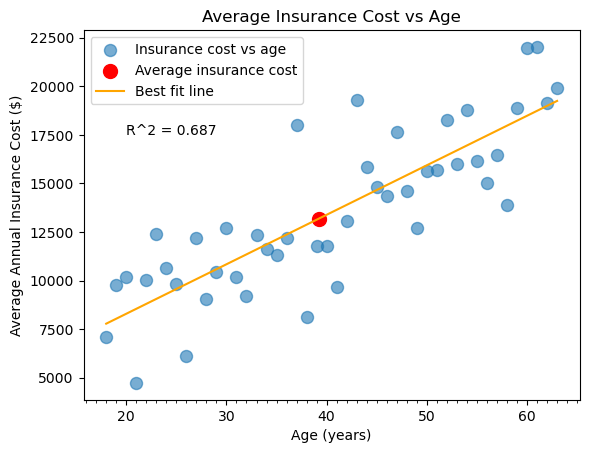

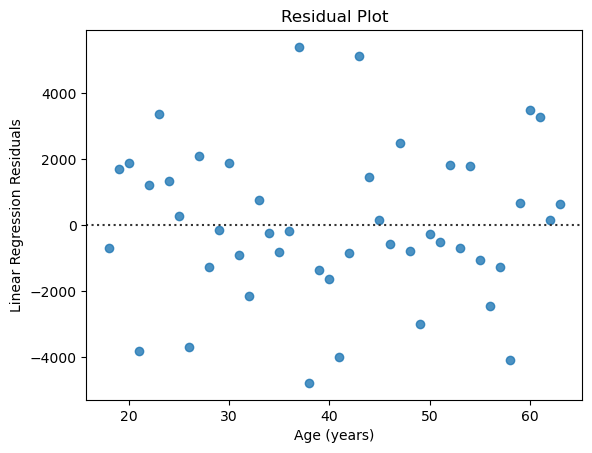

13183.389011730776
53.13


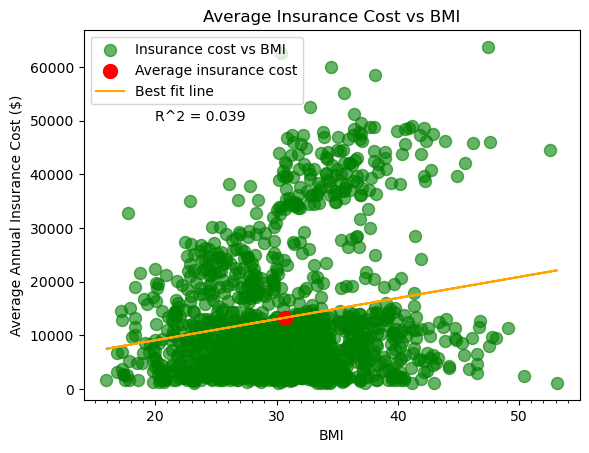

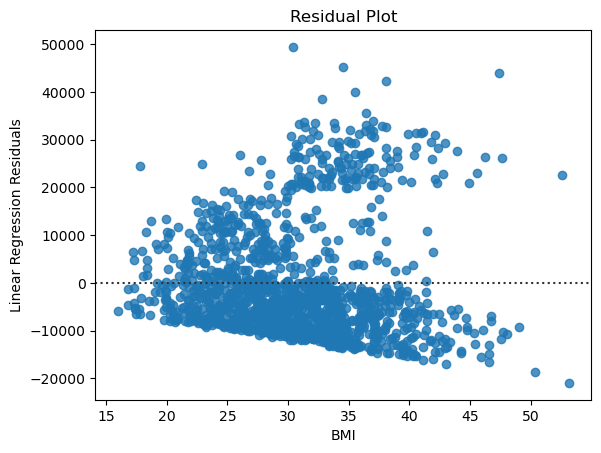

Text(0.5, 1.0, 'Regional Patient Makeup')

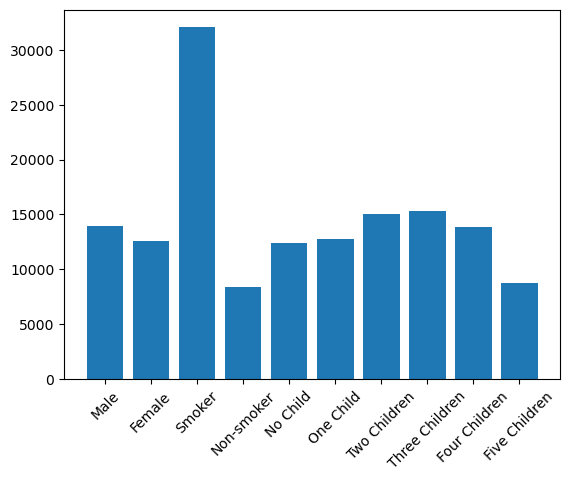

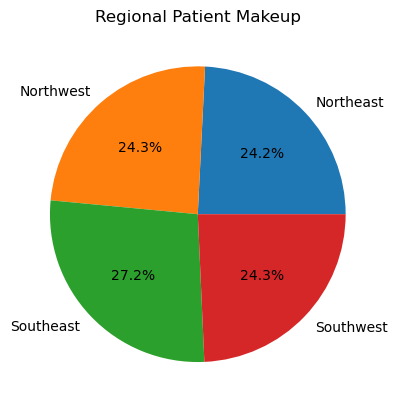

In [160]:
#Plot variable relationships
#Average insurance cost against age
average_cost_per_age = dict()
for age in range(min(AGES.values()), max(AGES.values())):
    age_group = get_subset(medical_pd_records, 'age', age)
    average_cost = get_average(age_group['charges']) 
    average_cost_per_age[str(age)] = average_cost
    
xs, ys = np.array(list(average_cost_per_age.keys()), dtype=np.float64), np.array(list(average_cost_per_age.values()), dtype=np.float64)
xs_df = pd.DataFrame(xs)
ys_df = pd.DataFrame(ys)
df_merged = pd.concat([xs_df, ys_df], ignore_index=True, sort=False, axis=1)
def best_fit_line(x_vals, y_vals):
    slope = (mean(x_vals)*mean(y_vals) - mean(x_vals * y_vals))/ ((mean(x_vals))**2 - mean(x_vals**2))
    y_intercept = mean(y_vals) - slope*mean(x_vals)
    return slope, y_intercept

#Method 1: using our own function to calculate slope and y-intercept
    

# #calculate slope and y_intercepts for cost against age
# slope, y_intercept = best_fit_line(xs, ys)

# #find regression line from slope and y-intercept
# reg_line = [(slope*x) + y_intercept for x in xs]

# #Making predictions
# avg_insurance_cost = (slope*AGE_AVG) + y_intercept

#Method 2: Use Python SciKit Library

#Create linear regression object
insurance_cost_age = linear_model.LinearRegression()
#Train model using training sets
insurance_cost_age.fit(xs.reshape(-1, 1), ys)
#obtain regression line using the model
reg_line = insurance_cost_age.predict(xs.reshape(-1, 1))
#Making predictions
r_squared = insurance_cost_age.score(xs.reshape(-1, 1), ys)
#print(insurance_cost_age.summary())
#Plot outputs and plot customization
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, label='Insurance cost vs age', alpha=0.6, s=75)
plt.scatter(AGE_AVG, avg_insurance_cost, label='Average insurance cost', color='red', s=100)
plt.plot(xs, reg_line, label='Best fit line', color='orange')
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.title('Average Insurance Cost vs Age')
plt.xlabel('Age (years)')
plt.ylabel('Average Annual Insurance Cost ($)')
#ax.set_title('R2: ' + str(r_squared))
plt.legend()
plt.annotate(('R^2 = {:.3f}').format(r_squared), (20, 17500))
plt.show()
sns.residplot(x=xs, y=ys)
plt.title('Residual Plot')
plt.xlabel('Age (years)')
plt.ylabel('Linear Regression Residuals')
plt.show()
print(avg_insurance_cost)

#Plot insurance cost vs BMI

#Method 2: Use Python SciKit Library

xs, ys = np.array(list(BMI.values()), dtype=np.float64),  np.array(list(COSTS.values()), dtype=np.float64)
print(max(xs))
#Create linear regression object

insurance_cost_bmi = linear_model.LinearRegression()

#Train model using training sets

insurance_cost_bmi.fit(xs.reshape(-1, 1), ys)

#obtain regression line using the model

reg_line = insurance_cost_bmi.predict(xs.reshape(-1, 1))

#Making predictions
r_squared = insurance_cost_bmi.score(xs.reshape(-1, 1), ys)
avg_insurance_cost_bmi = insurance_cost_bmi.predict(np.array([[BMI_AVG]]))[0]
#print(insurance_cost_age.summary())
#Plot outputs and plot customization

fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, label='Insurance cost vs BMI', alpha=0.6, s=75, color='green')
plt.scatter(BMI_AVG, avg_insurance_cost_bmi, label='Average insurance cost', color='red', s=100)
plt.plot(xs, reg_line, label='Best fit line', color='orange')
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.title('Average Insurance Cost vs BMI')
plt.xlabel('BMI')
plt.ylabel('Average Annual Insurance Cost ($)')
#ax.set_title('R2: ' + str(r_squared))
plt.legend()
plt.annotate(('R^2 = {:.3f}').format(r_squared), (20, 50000))
plt.show()
sns.residplot(x=xs, y=ys)
plt.title('Residual Plot')
plt.xlabel('BMI')
plt.ylabel('Linear Regression Residuals')
plt.show()



#Plot average values in bar charts to compare subsets
average_cost_per_child = dict()
for nr_children in range(min(CHILDREN.values()), max(CHILDREN.values())+1):
    nr_child_group = get_subset(medical_pd_records, 'children', nr_children)
    average_cost = get_average(nr_child_group['charges']) 
    average_cost_per_child[str(nr_children)] = average_cost
average_cost_per_child_list = list(average_cost_per_child.values())
(no_child_avg, one_child_avg, two_child_avg, three_child_avg, four_child_avg, five_child_avg) = (
average_cost_per_child_list[0], average_cost_per_child_list[1],
average_cost_per_child_list[2], average_cost_per_child_list[3],
average_cost_per_child_list[4], average_cost_per_child_list[5])


subsets = ['Male', 'Female','Smoker', 'Non-smoker', 'No Child', 'One Child', 'Two Children',
          'Three Children', 'Four Children', 'Five Children']
fig = plt.figure()
fig.clf()
ax = fig.add_subplot(111)
plt.bar(subsets, [MALE_COST_AVG, FEMALE_COST_AVG, SMOKER_COST_AVG, NON_SMOKER_COST_AVG, no_child_avg, one_child_avg, two_child_avg, three_child_avg, four_child_avg,
five_child_avg])
plt.setp(ax.get_xticklabels(), fontsize=10, rotation=45)

#Plot regional makeup of the patient population
fig, ax = plt.subplots()
labels = 'Northeast', 'Northwest', 'Southeast', 'Southwest'
sizes = (get_ratio(insurance_data, northeast_df), get_ratio(insurance_data, northwest_df),
         get_ratio(insurance_data, southeast_df), get_ratio(insurance_data, southwest_df))
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Regional Patient Makeup')
